<a href="https://colab.research.google.com/github/Seiko-5/Decision-Tree-Regression/blob/main/_02_Decision_Tree_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Loading Data Set

In [ ]:
# Data Manipulation libraries

import pandas as pd
import numpy as np

Most common libraries are pre-installed in Google Colab environment. However, sometimes you would need libraries that are not installed. You can use "!pip install (libname)" to install such libraries.

In [ ]:
!pip install scipy

In [ ]:
# Load the data set as df_boston

df_boston = pd.read_csv('tp3_boston_data.csv')

# 02. Inspecting Data Set

In [ ]:
# We print the value of the boston_dataset to understand what it contains. print(boston_dataset.keys()) gives
 print(df_boston.keys()) 

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')


**Description of the dataset:**  
CRIM - per capita crime rate by town  
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.  
INDUS - proportion of non-retail business acres per town.  
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
NOX - nitric oxides concentration (parts per 10 million)  
RM - average number of rooms per dwelling  
AGE - proportion of owner-occupied units built prior to 1940  
DIS - weighted distances to five Boston employment centres  
RAD - index of accessibility to radial highways  
TAX - full-value property-tax rate per 10,000 dollars  
PTRATIO - pupil-teacher ratio by town  
LSTAT - % lower status of the population  
MEDV - Median value of owner-occupied homes in $1000's (target)   

In [ ]:
# Data set's information --(looking for N/A values,Range, Columns, Data type)
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [ ]:
## Inspect the data set's 1st rows
df_boston.head()

crim    zn  indus  chas    nox  ...  rad  tax  ptratio  lstat  medv
0  0.00632  18.0   2.31     0  0.538  ...    1  296     15.3   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...    2  242     17.8   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...    2  242     17.8   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...    3  222     18.7   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...    3  222     18.7   5.33  36.2

[5 rows x 13 columns]

In [ ]:
# Inspect the data set's last rows
df_boston.tail()

crim   zn  indus  chas    nox  ...  rad  tax  ptratio  lstat  medv
501  0.06263  0.0  11.93     0  0.573  ...    1  273     21.0   9.67  22.4
502  0.04527  0.0  11.93     0  0.573  ...    1  273     21.0   9.08  20.6
503  0.06076  0.0  11.93     0  0.573  ...    1  273     21.0   5.64  23.9
504  0.10959  0.0  11.93     0  0.573  ...    1  273     21.0   6.48  22.0
505  0.04741  0.0  11.93     0  0.573  ...    1  273     21.0   7.88  11.9

[5 rows x 13 columns]

In [ ]:
# Discriptive statistics of the data set
print(df_boston.describe())

             crim          zn       indus  ...     ptratio       lstat        medv
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...   18.455534   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...    2.164946    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...   12.600000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...   17.400000    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...   19.050000   11.360000   21.200000
75%      3.677082   12.500000   18.100000  ...   20.200000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...   22.000000   37.970000   50.000000

[8 rows x 13 columns]


In [ ]:
"""
    object − Summarizes String columns
    number − Summarizes Numeric columns
    all − Summarizes all columns together (Should not pass it as a list value)
"""
print (df_boston. describe(include='all'))

             crim          zn       indus  ...     ptratio       lstat        medv
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...   18.455534   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...    2.164946    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...   12.600000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...   17.400000    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...   19.050000   11.360000   21.200000
75%      3.677082   12.500000   18.100000  ...   20.200000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...   22.000000   37.970000   50.000000

[8 rows x 13 columns]


In [ ]:
# Multiple statistics for selected columns using .agg funtion
df_boston[['age','crim']].agg(['min','mean','max','median'])

age       crim
min       2.900000   0.006320
mean     68.574901   3.613524
max     100.000000  88.976200
median   77.500000   0.256510

**Basic Descriptive Statistics**  

*  describe -	Basic statistics (count, mean, std, min, quantiles, max)
*  min, max -		Minimum and maximum values
*  mean, median, mode -		Arithmetic average, median and mode
*  var, std -		Variance and standard deviation
*  sem	 -	Standard error of mean
*  skew	 -	Sample skewness
*  kurt -		kurtosis

In [ ]:
# Returns a random sample of the data frame -- 10 is the sample size
print(df_boston.sample(10))

         crim    zn  indus  chas    nox  ...  rad  tax  ptratio  lstat  medv
383   7.99248   0.0  18.10     0  0.700  ...   24  666     20.2  24.56  12.3
184   0.08308   0.0   2.46     0  0.488  ...    3  193     17.8  13.98  26.4
13    0.62976   0.0   8.14     0  0.538  ...    4  307     21.0   8.26  20.4
415  18.08460   0.0  18.10     0  0.679  ...   24  666     20.2  29.05   7.2
260   0.54011  20.0   3.97     0  0.647  ...    5  264     13.0   9.59  33.8
371   9.23230   0.0  18.10     0  0.631  ...   24  666     20.2   9.53  50.0
337   0.03041   0.0   5.19     0  0.515  ...    5  224     20.2  10.56  18.5
151   1.49632   0.0  19.58     0  0.871  ...    5  403     14.7  13.28  19.6
427  37.66190   0.0  18.10     0  0.679  ...   24  666     20.2  14.52  10.9
85    0.05735   0.0   4.49     0  0.449  ...    3  247     18.5   6.53  26.6

[10 rows x 13 columns]


In [ ]:
# We print the value of the boston_dataset to understand what it contains. print(boston_dataset.keys()) gives
 print(df_boston.keys()) 

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')


**Description of the dataset:**  
CRIM - per capita crime rate by town  
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.  
INDUS - proportion of non-retail business acres per town.  
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
NOX - nitric oxides concentration (parts per 10 million)  
RM - average number of rooms per dwelling  
AGE - proportion of owner-occupied units built prior to 1940  
DIS - weighted distances to five Boston employment centres  
RAD - index of accessibility to radial highways  
TAX - full-value property-tax rate per 10,000 dollars  
PTRATIO - pupil-teacher ratio by town  
LSTAT - % lower status of the population  
MEDV - Median value of owner-occupied homes in $1000's (target)   

In [ ]:
# Data set's information --(looking for N/A values,Range, Columns, Data type)
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [ ]:
## Inspect the data set's 1st rows
df_boston.head()

crim    zn  indus  chas    nox  ...  rad  tax  ptratio  lstat  medv
0  0.00632  18.0   2.31     0  0.538  ...    1  296     15.3   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...    2  242     17.8   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...    2  242     17.8   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...    3  222     18.7   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...    3  222     18.7   5.33  36.2

[5 rows x 13 columns]

In [ ]:
# Inspect the data set's last rows
df_boston.tail()

crim   zn  indus  chas    nox  ...  rad  tax  ptratio  lstat  medv
501  0.06263  0.0  11.93     0  0.573  ...    1  273     21.0   9.67  22.4
502  0.04527  0.0  11.93     0  0.573  ...    1  273     21.0   9.08  20.6
503  0.06076  0.0  11.93     0  0.573  ...    1  273     21.0   5.64  23.9
504  0.10959  0.0  11.93     0  0.573  ...    1  273     21.0   6.48  22.0
505  0.04741  0.0  11.93     0  0.573  ...    1  273     21.0   7.88  11.9

[5 rows x 13 columns]

In [ ]:
# Discriptive statistics of the data set
print(df_boston.describe())

             crim          zn       indus  ...     ptratio       lstat        medv
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...   18.455534   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...    2.164946    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...   12.600000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...   17.400000    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...   19.050000   11.360000   21.200000
75%      3.677082   12.500000   18.100000  ...   20.200000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...   22.000000   37.970000   50.000000

[8 rows x 13 columns]


In [ ]:
"""
    object − Summarizes String columns
    number − Summarizes Numeric columns
    all − Summarizes all columns together (Should not pass it as a list value)
"""
print (df_boston. describe(include='all'))

             crim          zn       indus  ...     ptratio       lstat        medv
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...   18.455534   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...    2.164946    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...   12.600000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...   17.400000    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...   19.050000   11.360000   21.200000
75%      3.677082   12.500000   18.100000  ...   20.200000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...   22.000000   37.970000   50.000000

[8 rows x 13 columns]


In [ ]:
# Multiple statistics for selected columns using .agg funtion
df_boston[['age','crim']].agg(['min','mean','max','median'])

age       crim
min       2.900000   0.006320
mean     68.574901   3.613524
max     100.000000  88.976200
median   77.500000   0.256510

**Basic Descriptive Statistics**  

*  describe -	Basic statistics (count, mean, std, min, quantiles, max)
*  min, max -		Minimum and maximum values
*  mean, median, mode -		Arithmetic average, median and mode
*  var, std -		Variance and standard deviation
*  sem	 -	Standard error of mean
*  skew	 -	Sample skewness
*  kurt -		kurtosis

In [ ]:
# Returns a random sample of the data frame -- 10 is the sample size
print(df_boston.sample(10))

         crim    zn  indus  chas    nox  ...  rad  tax  ptratio  lstat  medv
380  88.97620   0.0  18.10     0  0.671  ...   24  666     20.2  17.21  10.4
53    0.04981  21.0   5.64     0  0.439  ...    4  243     16.8   8.43  23.4
8     0.21124  12.5   7.87     0  0.524  ...    5  311     15.2  29.93  16.5
168   2.30040   0.0  19.58     0  0.605  ...    5  403     14.7  11.10  23.8
225   0.52693   0.0   6.20     0  0.504  ...    8  307     17.4   4.63  50.0
78    0.05646   0.0  12.83     0  0.437  ...    5  398     18.7  12.34  21.2
251   0.21409  22.0   5.86     0  0.431  ...    7  330     19.1   3.59  24.8
387  22.59710   0.0  18.10     0  0.700  ...   24  666     20.2  31.99   7.4
95    0.12204   0.0   2.89     0  0.445  ...    2  276     18.0   6.65  28.4
220   0.35809   0.0   6.20     1  0.507  ...    8  307     17.4   9.71  26.7

[10 rows x 13 columns]


# 03. Visualization & Plotting

In [ ]:
# Visualization libraries

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# we use inline comand here. Insted of plt.show() we can direcly run the plot. (In pycham, spider this comad will not work)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


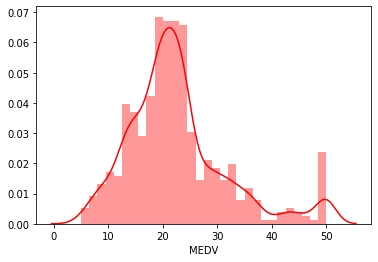

' More about seaborn\nhttps://seaborn.pydata.org/generated/seaborn.distplot.html '

In [ ]:
# Let’s first plot the distribution of the target variable. (In this case target variabale is MEDV)

# We will use the distplot function from the seaborn library.

#Histogram of MEDV by binning to 30 bins

sns.distplot(df_boston['medv'], bins=(30), color="red", axlabel="MEDV")  
plt.show()

""" More about seaborn
https://seaborn.pydata.org/generated/seaborn.distplot.html """

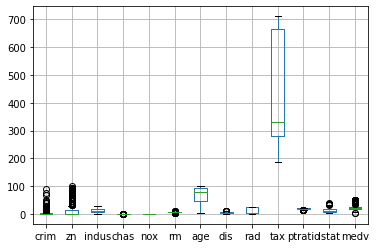

In [ ]:
# Create box plots
df_boston.boxplot()


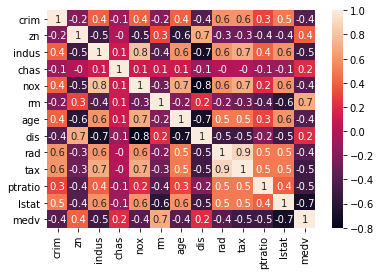

In [ ]:
# create a correlation matrix that measures the linear relationships between the variables. 

# The correlation matrix can be formed by using the corr function from the pandas dataframe library. 

# We will use the heatmap function from the seaborn library to plot the correlation matrix.

correlation_matrix = df_boston.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

Observations:

*  To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

*  An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same goes for the features DIS and AGE which have a correlation of -0.75.

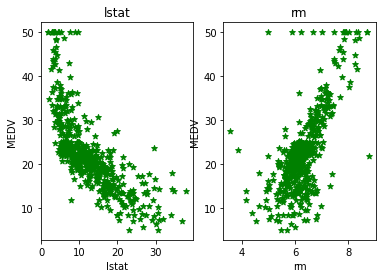

In [ ]:
# Based on the above observations we will RM and LSTAT as our features. 

#Using a scatter plot let’s see how these features vary with MEDV.

features = ['lstat', 'rm']
target = df_boston['medv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df_boston[col]
    y = target
    plt.scatter(x, y, marker='*',color="green")
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
  

plt.show()

# 04. Pre-Processing and Feature Engineering Data Set

 We can improve the accuracy by focusing on the data pre-processing and feature engineering. One approach is to transform skewed data.

Visualize the skewness of the dataset, and transform the data accordingly (e.g., log, reciprocal (1/x) or square transformation.)

An example can be found from this medium article on Transforming Skewed Data for Machine Learning.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2673257be0>,
      dtype=object)

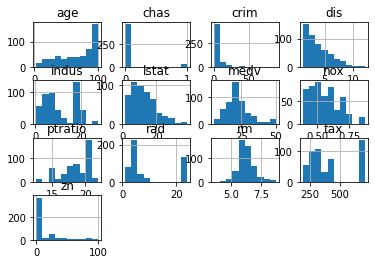

In [ ]:
# Visualize the data discribtion using pandas dataframe:
df_boston.hist()

## Calculate Skewness for all the Continous Variables.

In [ ]:
# Determine index for continouse variables
cts_vars = df_boston.dtypes[df_boston.dtypes != 'object'].index

# Calculate the skewness and then sort
skew_vars = df_boston[cts_vars].skew().sort_values(ascending=False)
print(skew_vars)

crim       5.223149
chas       3.405904
zn         2.225666
medv       1.108098
dis        1.011781
rad        1.004815
lstat      0.906460
nox        0.729308
tax        0.669956
rm         0.403612
indus      0.295022
age       -0.598963
ptratio   -0.802325
dtype: float64


We can address skewed variables by transforming them (i.e. applying the same function to each value). 

Common transformations include square root (sqrt(x)), logarithmic (log(x)), and reciprocal (1/x).

Ploting Skiwed Variable

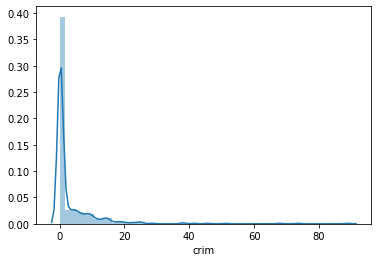

In [ ]:
sns.distplot(df_boston['crim'])

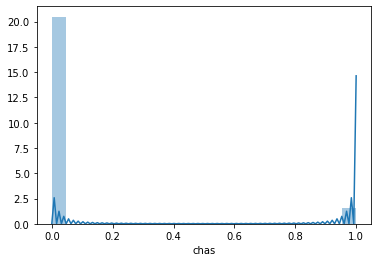

In [ ]:
sns.distplot(df_boston['chas'])

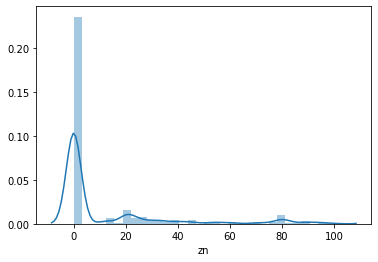

In [ ]:
sns.distplot(df_boston['zn'])

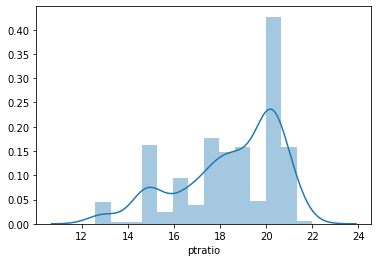

In [ ]:
sns.distplot(df_boston['ptratio'])

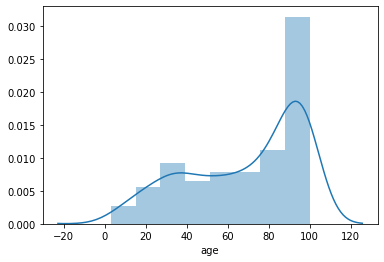

In [ ]:
sns.distplot(df_boston['age'])

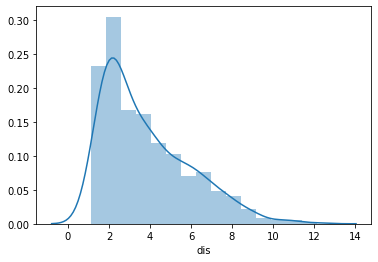

In [ ]:
sns.distplot(df_boston['dis'])

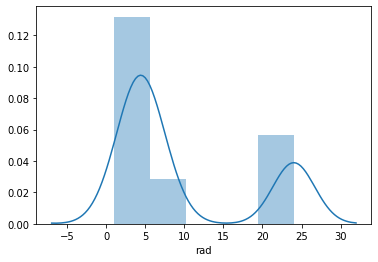

In [ ]:
sns.distplot(df_boston['rad'])

## Change the Variable Names to Transformation

In [ ]:
crim_var = df_boston['crim']

In [ ]:
chas_var = df_boston['chas']

In [ ]:
zn_var = df_boston['zn']

In [ ]:
ptratio_var = df_boston['ptratio']

In [ ]:
age_var = df_boston['age']

In [ ]:
dis_var = df_boston['dis']

In [ ]:
rad_var = df_boston['rad']

## Square Root Transformation.

In [ ]:
sqrt_crim = crim_var ** (1/2)

In [ ]:
sqrt_chas = chas_var ** (1/2)

In [ ]:
sqrt_zn = zn_var  ** (1/2)

In [ ]:
sqrt_ptratio = ptratio_var  ** (1/2)

In [ ]:
sqrt_age = age_var  ** (1/2)

In [ ]:
sqrt_dis = dis_var  ** (1/2)

In [ ]:
sqrt_rad = rad_var  ** (1/2)

### Visualisation of the Squre Root Transformation

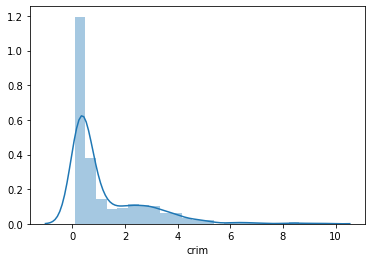

In [ ]:
sns.distplot(sqrt_crim)

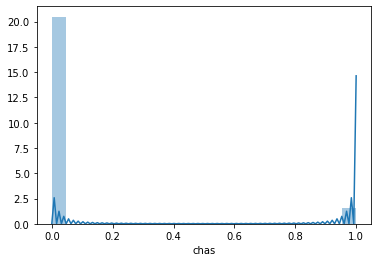

In [ ]:
sns.distplot(sqrt_chas)

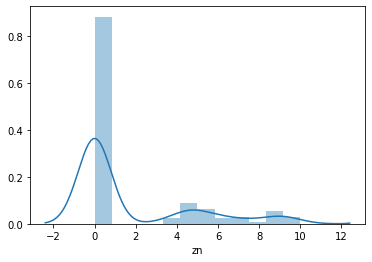

In [ ]:
sns.distplot(sqrt_zn)

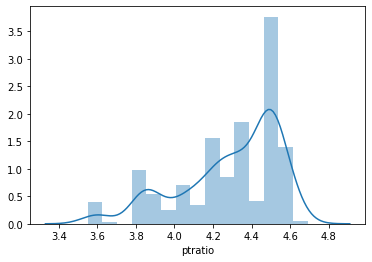

In [ ]:
sns.distplot(sqrt_ptratio)

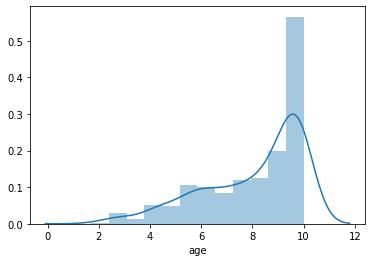

In [ ]:
sns.distplot(sqrt_age)

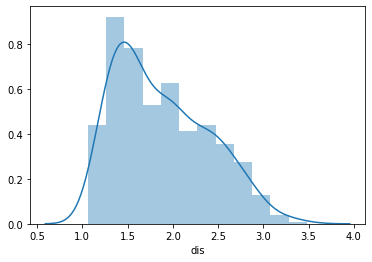

In [ ]:
sns.distplot(sqrt_dis)

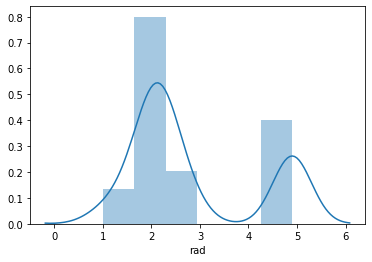

In [ ]:
sns.distplot(sqrt_rad)

## Log Transformation

In [ ]:
log_crim = np.log(crim_var)

In [ ]:
log_chas = np.log(chas_var)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
log_zn = np.log(zn_var)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
log_ptratio = np.log(ptratio_var)

In [ ]:
log_age = np.log(age_var)

In [ ]:
log_dis = np.log(dis_var)

In [ ]:
log_rad = np.log(rad_var)

### Visualization of the Log Transfomation

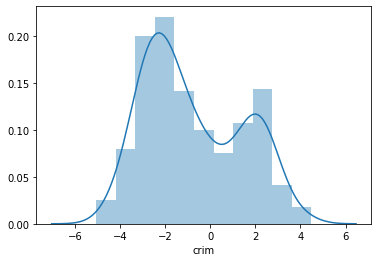

In [ ]:
sns.distplot(log_crim)

In [ ]:
sns.distplot(log_chas)

In [ ]:
sns.distplot(log_zn)

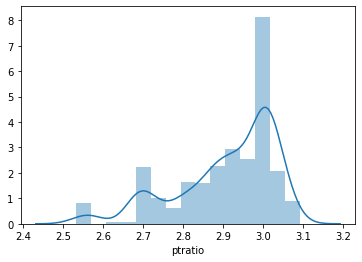

In [ ]:
sns.distplot(log_ptratio)

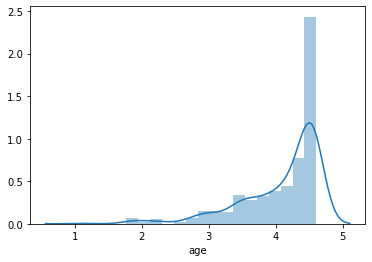

In [ ]:
sns.distplot(log_age)

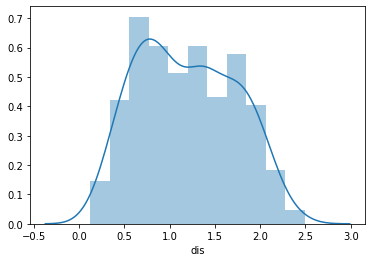

In [ ]:
sns.distplot(log_dis)

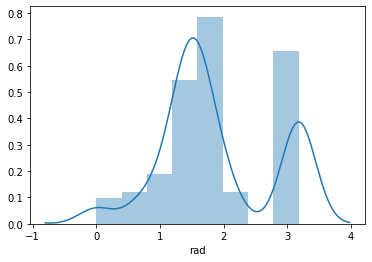

In [ ]:
sns.distplot(log_rad)

## Construct the New Variable

The log transformation seems to have de-skewed. 

Therefore, we can construct the new variables.

In [ ]:
df_boston['log_crim'] = log_crim

In [ ]:
df_boston['log_ptratio'] = log_ptratio

In [ ]:
df_boston['log_age'] = log_age

In [ ]:
df_boston['log_dis'] = log_dis

In [ ]:
df_boston['log_rad'] = log_rad

Important: Once you create the new variable, make sure delete the original variable when using the dataframe as a predictor.

In [ ]:
# Deleting varibales

del df_boston['dis']
del df_boston['rad']
del df_boston['crim']
del df_boston['ptratio']
del df_boston['age']



In [ ]:
# check the varibales

df_boston.keys()

Index(['zn', 'indus', 'chas', 'nox', 'rm', 'tax', 'lstat', 'medv', 'log_crim',
       'log_ptratio', 'log_age', 'log_dis', 'log_rad'],
      dtype='object')

# 05. Split the Data

In [ ]:
# Predictive Analytics models
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection  import train_test_split 

## from sklearn.model_selection  import train_test_split  is same for train val split

In [ ]:
# split the dataset into predictors (df_x) and target variable (df_y)

df_x = df_boston[['log_crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'log_age', 'log_dis', 'log_rad', 'tax', 'log_ptratio', 'lstat']]
df_y = df_boston[['medv']]

In [ ]:
"""
0.33 is the 1/3 of the data set.

Random_state simply sets a seed to the random generator, so that your train-test splits are always deterministic.
If you don't set a seed, it is different each time.It doesn't matter if the random_state is 0 or 1 or any other integer.
What matters is that it should be set the same value, if you want to validate your processing over multiple runs of the code
"""

X_train, X_val, Y_train, Y_val = train_test_split(df_x, df_y, test_size = 0.33, random_state = 5) 


In this we keep both variables to compare the results

# 06. Data Standardization 

Analysing the Dispertion of the Variables(Features)

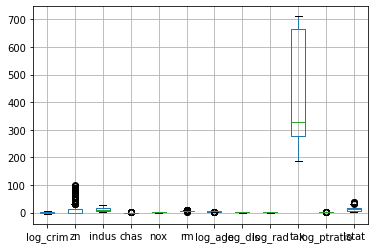

In [ ]:
# Box plot analysis
df_x.boxplot()

Data dispersion is extremely different among different features. Thus, scaling/standardization is required.

#### Data Standardization

In [ ]:
# Use standard scaling from sklearn library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
df_x_scaled = scaler.transform(df_x)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=df_x.columns)

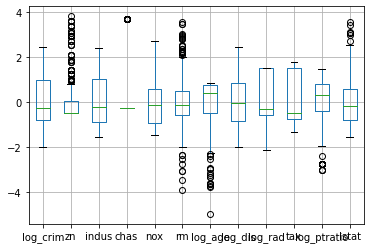

In [ ]:
# Show boxplot for scaled predictors
df_x_scaled.boxplot()

# 07. Decision Tree Regression 01

## Decision Tree Regression

In [ ]:
# Import matplotlib.pyplot for plotting our result 
import matplotlib.pyplot as plt 
  
# Import the regressor 
from sklearn.tree import DecisionTreeRegressor  

In [ ]:
# Create a regressor object 
regressor = DecisionTreeRegressor(random_state = 5 )  
  


In [ ]:
# Fit the regrasor with X train and Y train data 

regressor = regressor.fit(X_train,Y_train) 

In [ ]:
y_val_pred   = regressor.predict(X_val) 

compare some of our predicted values with the actual values and see how accurate we were:

In [ ]:
df =pd.DataFrame({'Actual':Y_val, 'Predicted':y_val_pred})
df

## Evaluating the Algorithm

To evaluate performance of the regression algorithm, the commonly used metrics are mean absolute error, mean squared error, and root mean squared error. The Scikit-Learn library contains functions that can help calculate these values for us. To do so, use this code from the metrics package

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Training accuracy
Y_train_predict = regressor.predict(X_train)
# Validation accuracy
Y_val_predict = regressor.predict(X_val)

In [ ]:
# Error calculation 

# Avarage of the square of the difference between the original values and the predicted values

error_train = np.sqrt(mean_squared_error(Y_train_predict, Y_train))
print('Training Root Mean Squared Error: ' + str(error_train))

error_val = np.sqrt(mean_squared_error(Y_val_predict, Y_val))
print('Validation Root Mean Squared Error: ' + str(error_val))

# Avarage diferance between the original value and the predicted value

error_train = mean_absolute_error(Y_train_predict, Y_train)
print('Training Mean Absolute Error: ' + str(error_train))

error_val = mean_absolute_error(Y_val_predict, Y_val)
print('Validation Mean Absolute Error: ' + str(error_val))

# Indication of the goodness of fit of a set of prediction to the actual value.

error_train = r2_score(Y_train_predict, Y_train)
print('Training R2 Error: ' + str(error_train))

error_val = r2_score(Y_val_predict, Y_val)
print('Validation R2 Error: ' + str(error_val))


Training Root Mean Squared Error: 0.0
Validation Root Mean Squared Error: 5.815486242741956
Training Mean Absolute Error: 0.0
Validation Mean Absolute Error: 3.3329341317365264
Training R2 Error: 1.0
Validation R2 Error: 0.6477819808230372


In [ ]:
# Print score of the decision tree (R2 Error)

print('regressor  train score %.3f, regressor test score: %.3f' % (
regressor.score(X_train,Y_train),
regressor.score(X_val, Y_val)))

regressor  train score 1.000, regressor test score: 0.639


##Visualising the Decision Tree

In [ ]:
# Loading the libaries to visualise the decision tree

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# 08. Post Pruning Decision Trees with Cost Complexity Pruning (Weakest Link Pruning)

### Total impurity of leaves vs effective alphas of pruned tree

Minimal cost complexity pruning recursively finds the node with the “weakest link”. 

The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. 

To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process.

As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [ ]:
# Create a regressor object 
regressor1 = DecisionTreeRegressor(random_state = 5 ) 

In [ ]:
path = regressor1.cost_complexity_pruning_path(X_train,Y_train.values.ravel())
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In the following plot, the maximum effective alpha value is removed, because it is the trivial tree with only one node.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

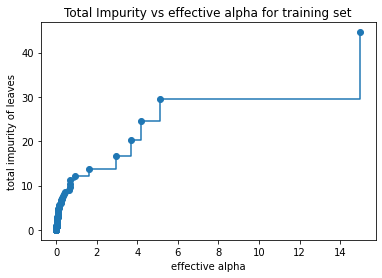

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    regressor1 = DecisionTreeRegressor(random_state=5, ccp_alpha=ccp_alpha)
    regressor1.fit(X_train,Y_train.values.ravel())
    clfs.append(regressor1)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 35.221482474828704


For the remainder of this example, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. 

Here we show that the number of nodes and tree depth decreases as alpha increases.

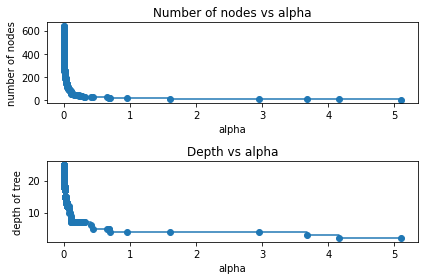

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [regressor1.tree_.node_count for regressor1 in clfs]
depth = [regressor1.tree_.max_depth for regressor1 in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Accuracy vs alpha for training and testing sets

When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 66% testing accuracy. 

As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.015 maximizes the testing accuracy.

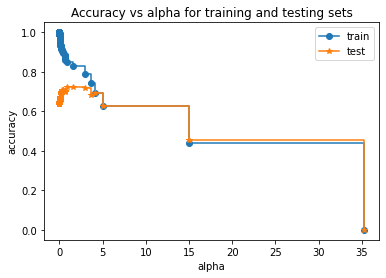

In [ ]:
train_scores = [regressor1.score(X_train, Y_train) for regressor1 in clfs]
test_scores = [regressor1.score(X_val, Y_val) for regressor1 in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='*', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

## Variable of Importance

In [ ]:
# Install python library for SHAP explainer toolbox
!pip install shap

In [ ]:
# Import shap library
import shap

In [ ]:
# Create a shap explainer from gradient boosting model
explainer = shap.TreeExplainer(regressor1)
shap_values = explainer.shap_values(X_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


# 09. Decision Tree Regression 02 - Pre Pruning Decisions

## Decision Tree Regression

In [ ]:
# Import matplotlib.pyplot for plotting our result 
import matplotlib.pyplot as plt 
  
# Import the regressor 
from sklearn.tree import DecisionTreeRegressor  

In [ ]:
# Create a regressor object 
regressor1 = DecisionTreeRegressor(random_state = 5, max_leaf_nodes=15,min_samples_leaf=25, max_depth=4, criterion= "mse")  
  


In [ ]:
# Fit the regrasor with X train and Y train data 

regressor1 = regressor1.fit(X_train,Y_train) 

In [ ]:
y_val_pred   = regressor1.predict(X_val) 

compare some of our predicted values with the actual values and see how accurate we were:

In [ ]:
df =pd.DataFrame({'Actual':Y_val, 'Predicted':y_val_pred})
df

## Evaluating the Algorithm

To evaluate performance of the regression algorithm, the commonly used metrics are mean absolute error, mean squared error, and root mean squared error. The Scikit-Learn library contains functions that can help calculate these values for us. To do so, use this code from the metrics package

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Training accuracy
Y_train_predict = regressor1.predict(X_train)
# Validation accuracy
Y_val_predict = regressor1.predict(X_val)

In [ ]:
# Error calculation 

# Avarage of the square of the difference between the original values and the predicted values

error_train = np.sqrt(mean_squared_error(Y_train_predict, Y_train))
print('Training Root Mean Squared Error: ' + str(error_train))

error_val = np.sqrt(mean_squared_error(Y_val_predict, Y_val))
print('Validation Root Mean Squared Error: ' + str(error_val))

# Avarage diferance between the original value and the predicted value

error_train = mean_absolute_error(Y_train_predict, Y_train)
print('Training Mean Absolute Error: ' + str(error_train))

error_val = mean_absolute_error(Y_val_predict, Y_val)
print('Validation Mean Absolute Error: ' + str(error_val))

# Indication of the goodness of fit of a set of prediction to the actual value.

error_train = r2_score(Y_train_predict, Y_train)
print('Training R2 Error: ' + str(error_train))

error_val = r2_score(Y_val_predict, Y_val)
print('Validation R2 Error: ' + str(error_val))


Training Root Mean Squared Error: 4.5259632899984945
Validation Root Mean Squared Error: 5.673275260214584
Training Mean Absolute Error: 3.0208731191887317
Validation Mean Absolute Error: 3.545968301787309
Training R2 Error: 0.6548073206799512
Validation R2 Error: 0.4647130327844119


In [ ]:
# Print score of the decision tree (R2 Error)

print('regressor  train score %.3f, regressor val score: %.3f' % (
regressor1.score(X_train,Y_train),
regressor1.score(X_val, Y_val)))

regressor  train score 0.743, regressor val score: 0.657


##Visualising the Decision Tree

In [ ]:
# Loading the libaries to visualise the decision tree

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

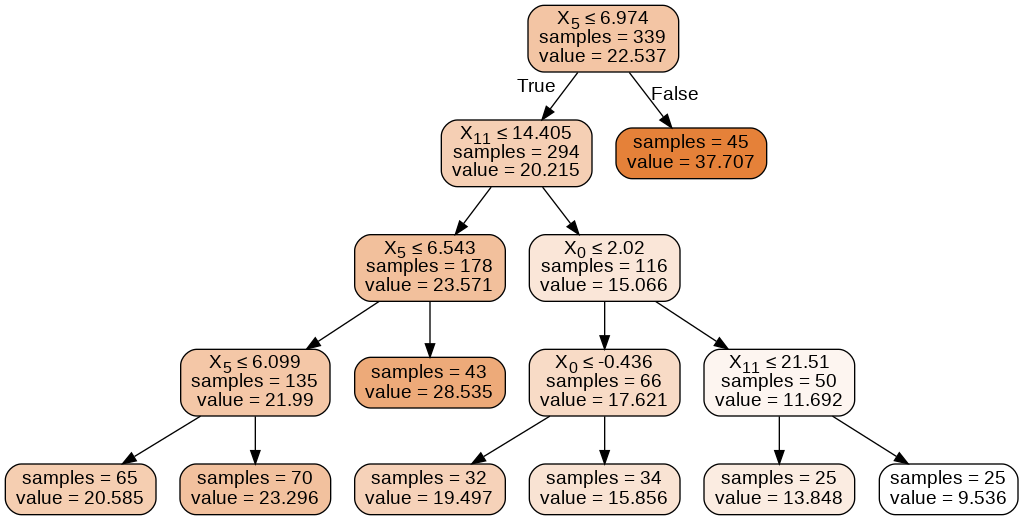

In [ ]:
dot_data = StringIO()
export_graphviz(regressor1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,impurity=False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())